In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
import matplotlib.pyplot as plt
from keras import Model
from scipy.optimize import minimize

Generating and Importing dataframe

In [2]:
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
import sklearn.datasets as dt

rng = np.random.RandomState(1)
X = 10 * rng.rand(1000, 10)
Y = 0.5 + np.dot(X, [1.5, -2., 1.,3.,10.,-5.5,8.,6.,1.,0.5])

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2) # Generating train and test dataset

min_val_x = X.min()
max_val_x = X.max()

min_val_y = Y.min()
max_val_y = Y.max()

X_train = (X_train - min_val_x) / (max_val_x - min_val_x)
X_test = (X_test - min_val_x) / (max_val_x - min_val_x)

Y_train = (Y_train - min_val_y) / (max_val_y - min_val_y)
Y_test = (Y_test - min_val_y) / (max_val_y - min_val_y)

Lasso regression using scikit-learn library

C:\Users\patel\AppData\Local\Temp\ipykernel_12420\169209889.py:23: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model_lasso.fit(X_train,Y_train)    # training the model
e:\Lectures\Arbeit\Sensorics\sens\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


   r2_score  intercept     NRMSE         0         1         2         3  \
0  0.999665        0.0  0.018313  0.058279 -0.070664  0.039769  0.113926   
1  0.996930        0.0  0.055405  0.052164 -0.052648  0.033626  0.108464   
2  0.831035        0.0  0.411054  0.011798  0.000000  0.000000  0.064679   
3 -0.614243        0.0  1.270528  0.000000  0.000000  0.000000  0.000000   

          4         5         6         7         8         9  lamda  
0  0.372138 -0.200035  0.298833  0.224597  0.040342  0.021320  0.000  
1  0.369031 -0.181131  0.295226  0.219340  0.035586  0.015946  0.001  
2  0.341467 -0.000000  0.274883  0.177153  0.000000  0.000000  0.010  
3  0.269215  0.000000  0.195035  0.069024  0.000000  0.000000  0.100  


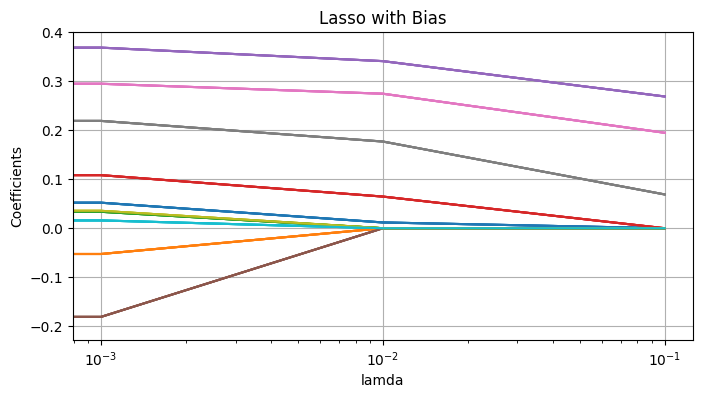

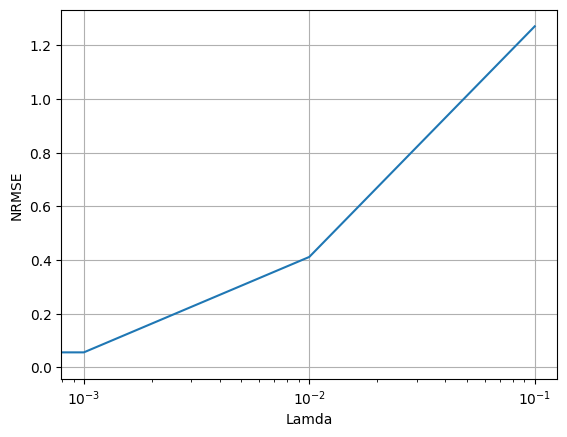

In [72]:
from sklearn.linear_model import Lasso
from importlib import reload
plt = reload(plt)

lamda = [0,0.001,0.01,0.1]   # an array with differnet values of tuning parameter

cf_lasso = []   # array of co-efficients for different lamda
r2_scores_lasso = []    # array of r2 scores for different lamda
intercept=[]    # array of biases for different lamda
NRMSE_s = []

def NRMSE(y,ym):
        # y: Process output, ym: Model output or predictions
        error = np.zeros(len(y))

        for i in range(len(y)):
            error[i] = (y[i]-ym[i])**2
            
        return np.sqrt(np.mean((error)/np.char.chararray.var(y)))

for i in lamda:
    model_lasso = Lasso(alpha = i,fit_intercept=False)
    model_lasso.fit(X_train,Y_train)    # training the model

    cf_lasso.append(model_lasso.coef_.tolist())
    intercept.append(model_lasso.intercept_)
    ym_lasso = model_lasso.predict(X_test)  # Generating model output
    r2_scores_lasso.append(r2_score(Y_test,ym_lasso))
    NRMSE_s.append(NRMSE(Y_test,ym_lasso))

# Genarating daframe with lamdas, r2_score, bias and co-efficients
df_lasso = pd.DataFrame(cf_lasso)
df_lasso['lamda'] = lamda
df_lasso.set_index('lamda')
df_lasso.insert(loc=0,column= 'r2_score',value=r2_scores_lasso)
df_lasso.insert(loc=1,column= 'intercept',value=intercept)
df_lasso.insert(loc=2,column= 'NRMSE',value=NRMSE_s)

print(df_lasso.head())

# Plotting diffenent values of lamda vs co-efficients
nwl,_ = np.array(cf_lasso).shape
plt.figure(figsize = (8,4))

for i in range(nwl):
    plt.plot(lamda, cf_lasso)

plt.xlabel('lamda')
plt.xscale('log')
plt.ylabel('Coefficients')
plt.title('Lasso with Bias')
plt.axis('tight')
plt.grid()
plt.show()

plt.plot(lamda,NRMSE_s)
plt.xscale('log')
plt.xlabel('Lamda')
plt.ylabel('NRMSE')
plt.axis('tight')
plt.grid()
plt.show()


Tuning hyperparamter for the best result

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipleline = Pipeline([('scaler',StandardScaler()),('model',Lasso())])
search = GridSearchCV(pipleline,{'model__alpha': np.array(lamda)},cv = 10, scoring = 'neg_mean_squared_error',return_train_score = False)
search.fit(X_train,Y_train)
print(search.best_params_)
search.best_estimator_[1].coef_

{'model__alpha': 0.0}


e:\Lectures\Arbeit\Sensorics\sens\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
e:\Lectures\Arbeit\Sensorics\sens\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
e:\Lectures\Arbeit\Sensorics\sens\lib\site-packages\sklearn\pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
e:\Lectures\Arbeit\Sensorics\sens\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordina

array([ 0.01568221, -0.02118759,  0.01065041,  0.03216971,  0.10606841,
       -0.05679746,  0.08475924,  0.06230389,  0.01066174,  0.0055008 ])

Creating class Coordinate Descent with Bias

In [46]:
class CoordinateDescentLassoWithBias(Model):
    def __init__(self, alpha, epoch = 1000, tol=1e-4):
        self.alpha = alpha  # tuning parameter(penalty term)  
        self.epoch =  epoch
        self.tol = tol  # No. of iterations (default = 1000)
        self.coef = None    # Weights or Co-eficients
        self.bias = None    # Bias or intercept

    # Generating soft threshold function to find the value of weights
    def soft_threshold(self,rho,lamda):
        if rho < - lamda:
            return rho + lamda
        elif rho > lamda:
            return rho - lamda
        else: 
            return 0


    def fit(self, X, y):
        X = np.column_stack((np.ones(len(X)), X))   # Training features
        m,n = X.shape
        beta = np.ones(n)  # array of bias and weights
        beta[0] = np.sum(y - np.dot(X[:, 1:], beta[1:])) / (X.shape[0])  

        for iteration in range(self.epoch):
            beta_old = np.copy(beta)            
            
            for j in range(n):
                start = 1
                beta[j] = 0.0
                error  = y - np.dot(X, beta)
                rho = np.dot(X[:, j], error )
                lamda  = self.alpha*m

                beta[j] = self.soft_threshold(rho , lamda ) / (X[:, j]**2).sum()
                beta[0] = np.sum(y - np.dot(X[:, 1:], beta[1:])) / (X.shape[0])    
        
        # Check for convergence
            if np.linalg.norm(beta - beta_old) < self.tol:
                print("Optimization converged after", iteration+1, "iterations")
                break
        
        self.coef = beta[1:]
        self.bias = beta[0]
        
        return self

    # Predicting model output
    def predict(self, X):
        y = np.dot(X, self.coef) + self.bias
                
        return y

    # Normalized root mean square error
    def NRMSE(self,y,ym):
        # y: Process output, ym: Model output or predictions
        error = np.zeros(len(y))

        for i in range(len(y)):
            error[i] = (y[i]-ym[i])**2
            
        return np.sqrt(np.mean((error)/np.char.chararray.var(y)))


Implemantation of Coordinate Descent with Bias

Optimization converged after 36 iterations
Optimization converged after 35 iterations
Optimization converged after 31 iterations
Optimization converged after 4 iterations
      NRMSE  r2_score      bias         0         1         2         3  \
0  0.000304  1.000000  0.015528  0.055392 -0.073793  0.036950  0.110881   
1  0.062479  0.996096  0.050346  0.043151 -0.062924  0.024348  0.098145   
2  0.457093  0.791066  0.213283  0.000000  0.000000  0.000000  0.000000   
3  1.000872 -0.001745  0.446818  0.000000  0.000000  0.000000  0.000000   

          4         5         6         7         8         9  lamda  
0  0.369396 -0.203093  0.295575  0.221611  0.037016  0.018474  0.000  
1  0.359694 -0.191345  0.284586  0.209987  0.025061  0.007157  0.001  
2  0.259779 -0.084207  0.187416  0.103187  0.000000  0.000000  0.010  
3  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.100  


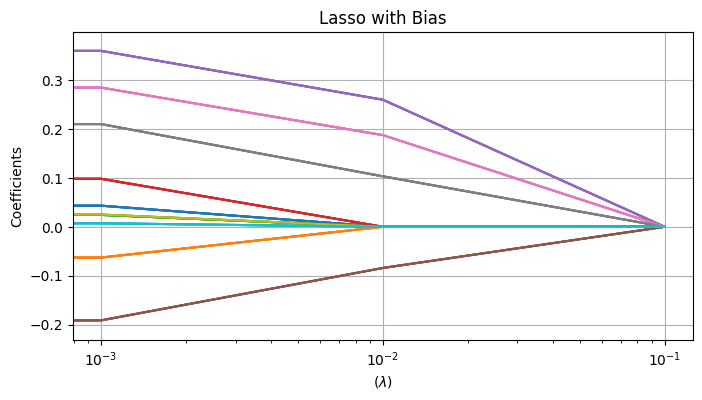

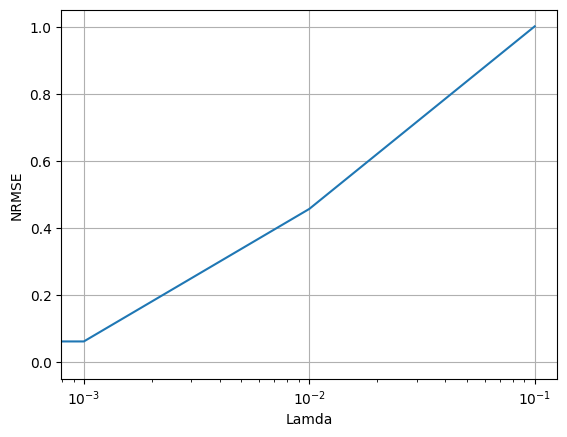

In [47]:
w_w = []
r2_scores_w= []
NRMSE_w = []
bias = []


for i in lamda:
    model = CoordinateDescentLassoWithBias(i)
    model.fit(X_train,Y_train)
    w_w.append(model.coef)
    bias.append(model.bias)
    ym_w = model.predict(X_test)
    r2_scores_w.append(r2_score(Y_test,ym_w))
    NRMSE_w.append(model.NRMSE(Y_test,ym_w))


df_w = pd.DataFrame(w_w)
df_w['lamda'] = lamda
df_w.set_index('lamda')

df_w.insert(loc=0,column= 'r2_score',value=r2_scores_w)
df_w.insert(loc=0,column= 'NRMSE',value=NRMSE_w)
df_w.insert(loc=2,column= 'bias',value=bias)

print(df_w.head())

nw,_ = np.array(w_w).shape
plt.figure(figsize = (8,4))

for i in range(nw):
    plt.plot(lamda, w_w)

plt.xscale('log')
plt.xlabel('($\\lambda$)')
plt.ylabel('Coefficients')
plt.title('Lasso with Bias')
plt.axis('tight')
plt.grid()
plt.show()


plt.plot(lamda,NRMSE_w)
plt.xscale('log')
plt.xlabel('Lamda')
plt.ylabel('NRMSE')
plt.axis('tight')
plt.grid()
plt.show()



Creating class Coordinate Descent without Bias

In [50]:
class CoordinateDescentLassoWithoutBias(CoordinateDescentLassoWithBias):
    def __init__(self, alpha, epoch= 1000,tol = 1e-4):
        self.alpha = alpha  
        self.epoch = epoch 
        self.tol = tol 
        self.coef = None 

    def fit(self, X, y):
        m,n = X.shape
        beta = np.zeros(n)        

        for iteration in range(self.epoch):
            beta_old = np.copy(beta)
            
            for j in range(n):
                beta[j] = 0.0
                error = y - np.dot(X, beta)
                rho = np.dot(X[:, j], error)
                lamda = self.alpha*m

                beta[j] = self.soft_threshold( rho, lamda) / (X[:, j]**2).sum()     

            if np.linalg.norm(beta - beta_old) < self.tol:
                print("Optimization converged after", iteration+1, "iterations")
                break   
    
        self.coef = beta
        
        return self

    def predict(self, X):        
        y = np.dot(X, self.coef)        
        return y

Implementation of Coordinate Descent without Bias

Optimization converged after 96 iterations
Optimization converged after 94 iterations
Optimization converged after 37 iterations
Optimization converged after 23 iterations
      NRMSE  r2_score         0         1         2         3         4  \
0  0.018338  0.999664  0.058181 -0.070766  0.039683  0.113869  0.372162   
1  0.055471  0.996923  0.052062 -0.052742  0.033553  0.108425  0.369071   
2  0.411040  0.831046  0.011771  0.000000  0.000000  0.064742  0.341537   
3  1.270558 -0.614317  0.000000  0.000000  0.000000  0.000000  0.269150   

          5         6         7         8         9  lamda  
0 -0.199936  0.298953  0.224682  0.040377  0.021304  0.000  
1 -0.181027  0.295340  0.219410  0.035606  0.015916  0.001  
2  0.000000  0.274875  0.177076  0.000000  0.000000  0.010  
3  0.000000  0.195043  0.069068  0.000000  0.000000  0.100  


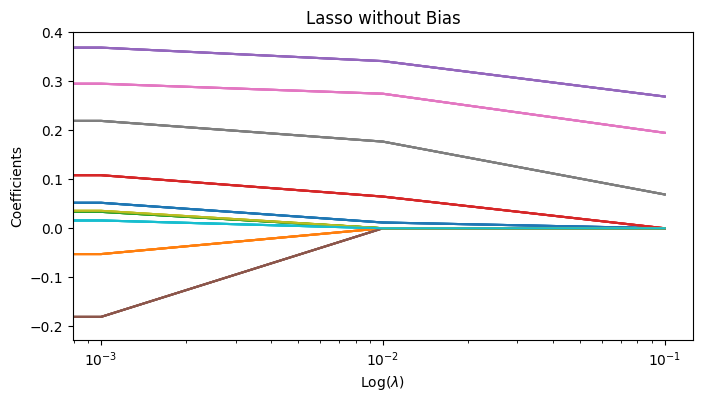

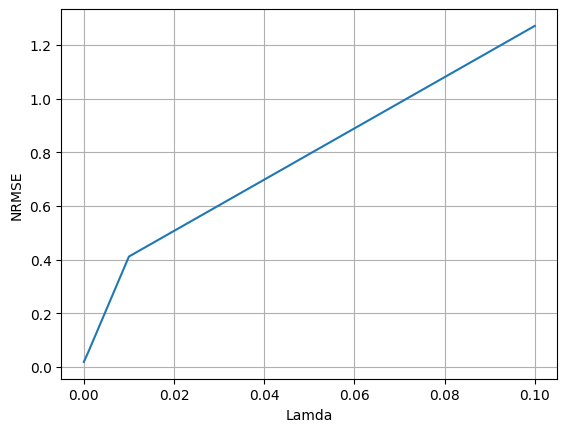

In [51]:
w_wo = []
r2_scores_wo= []
NRMSE_wo = []

for i in lamda:
    model = CoordinateDescentLassoWithoutBias(i)
    model.fit(X_train,Y_train)
    
    w_wo.append(model.coef)
    ym_wo = model.predict(X_test)
    r2_scores_wo.append(r2_score(Y_test,ym_wo))
    NRMSE_wo.append(model.NRMSE(Y_test,ym_wo)) 

df_wo = pd.DataFrame(w_wo)
df_wo.insert(loc=0,column= 'r2_score',value=r2_scores_wo)
df_wo.insert(loc=0,column= 'NRMSE',value=NRMSE_wo)
df_wo['lamda'] = lamda
df_wo.set_index('lamda')

print(df_wo.head())

nwo,_ = np.array(w_wo).shape
plt.figure(figsize = (8,4))

for i in range(nwo):
    plt.plot(lamda, w_wo)

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('Coefficients')
plt.title('Lasso without Bias')
plt.axis('tight')
plt.show()

plt.plot(lamda,NRMSE_wo)
plt.xlabel('Lamda')
plt.ylabel('NRMSE')
plt.axis('tight')
plt.grid()
plt.show()
